# Preprocessing audio data for Deep Learning
### preprocessing steps
- Acquire the dataset.
- Import all the crucial libraries.
- Import the dataset. 
- Identifying and handling the missing values. 
- Encoding the categorical data. 
- Splitting the dataset. 
- understanding and visualizing the data
- Feature scaling.

In [2]:
!pip install librosa

  Using cached https://files.pythonhosted.org/packages/79/75/e22272b9c2185fc8f3af6ce37229708b45e8b855fd4bc38b4d6b040fff65/resampy-0.2.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/b3/d1/e324634c5867a668774d6fe233a83228da4ba16521e19059c15df899737d/audioread-2.1.9.tar.gz
  Using cached https://files.pythonhosted.org/packages/b8/de/24e4035f06540ebb4e9993238ede787063875b003e79c537511d32a74d29/SoundFile-0.10.3.post1-py2.py3.cp26.cp27.cp32.cp33.cp34.cp35.cp36.pp27.pp32.pp33-none-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/55/85/70c6602b078bd9e6f3da4f467047e906525c355a4dacd4f71b97a35d9897/joblib-1.0.1-py3-none-any.whl
  Stored in directory: C:\Users\A\AppData\Local\pip\Cache\wheels\fa\c1\56\e0e12c6f7f3d2cdea9712b35136a2d40a7817c6210ec096485
  Stored in directory: C:\Users\A\AppData\Local\pip\Cache\wheels\6d\55\fc\0d9cb2a5a52cc24d86cfcd5db4d40f448a43b9a6046c019fc1
Successfully built resampy audioread
  Found existing installation: packaging 19.0
    U

In [1]:
import librosa,librosa.display
import matplotlib.pyplot as plt

In [2]:
file = "blues.00000.wav"

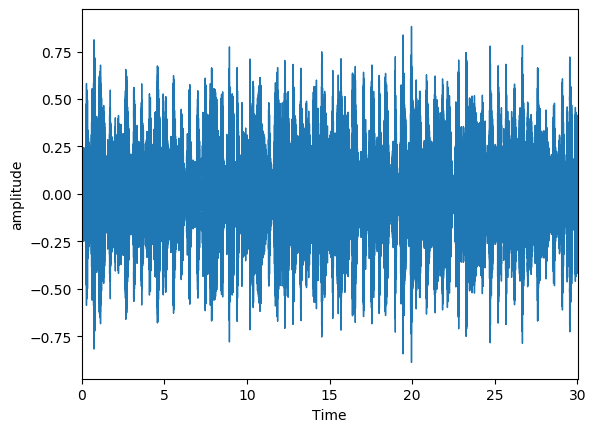

In [3]:
# waveform
signal, sr = librosa.load(file, sr=22050) # signal will have numpy array with sr * T=22050*30 amplitude values
librosa.display.waveplot(signal,sr=sr)
plt.xlabel("Time")
plt.ylabel("amplitude")
plt.show()

# FFT -> power spectrum : moving from time to freq domain


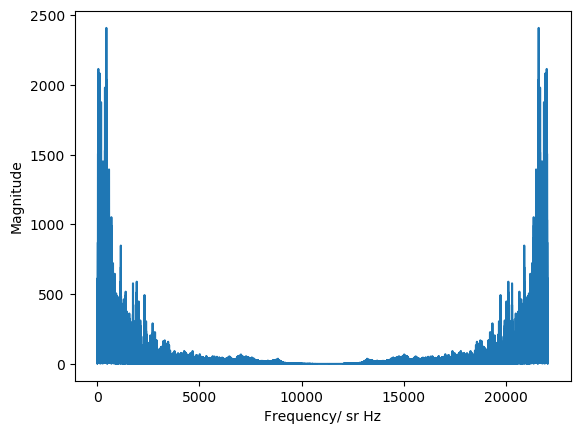

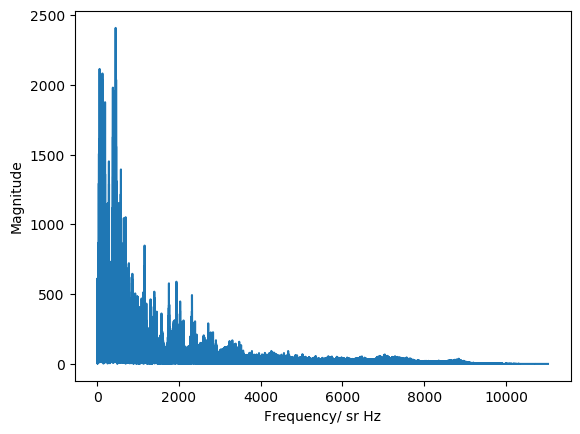

In [4]:
import numpy as np

#fft contains np 1D array that has 22050*30 complex amplitude values. 
fft=np.fft.fft(signal)

# we want to find the magnitude of these complex values
# these magnitude values indicates the contribution of each frequency bins to the overall sound wave
magnitude = np.abs(fft)
 
# map magnitude to relative freq bins
frequency = np.linspace(0,sr,len(magnitude))
left_frequency = frequency[: int(len(frequency)/2)]
left_magnitude = magnitude[: int(len(frequency)/2)]

plt.plot(frequency,magnitude)
plt.xlabel("Frequency/ sr Hz")
plt.ylabel("Magnitude")
plt.show()

plt.plot(left_frequency,left_magnitude)
plt.xlabel("Frequency/ sr Hz")
plt.ylabel("Magnitude")
plt.show()




#### SUMMARY FROM THE POWER SPECTRUM
- more energy in the lower frequencies so more contribution by the low frequencies
- the plot is symmetrical.Half of the plot reps half of the sr. We dont
 need the full plot
- sr = sample rate = frequency




# STFT gives spectrogram

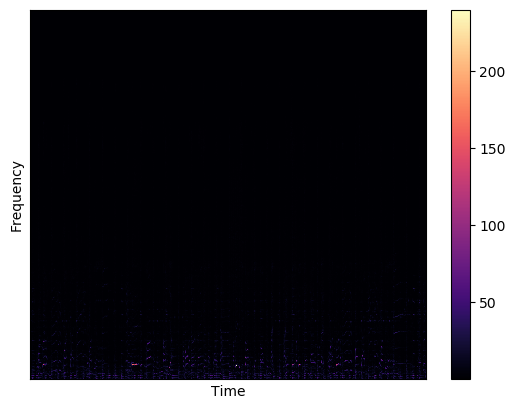

In [5]:
#no_of samples per fft = window size for 1 fft
no_of_samples_per_fft = 2048
# amount we are shifting the frame. so we shift 512 units
hop_length = 512
stft = librosa.core.stft(signal,hop_length=hop_length, n_fft = no_of_samples_per_fft)
spectrogram = np.abs(stft)

# shows a heatmap type data rep
librosa.display.specshow(spectrogram,sr=sr,hop_length=hop_length)

plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()



#### SUMMARY
- most of the frequencies has very low amplitudes/energy/contribute less to the overall sound
- this is due to visualizing loudness in linear form so now to visualize for more sense, we should represent loudness/amplitude in logarithmic form
    - using __log_spectrogram__ ie __amplitude_to_db__
    - log of the previous amplitudes

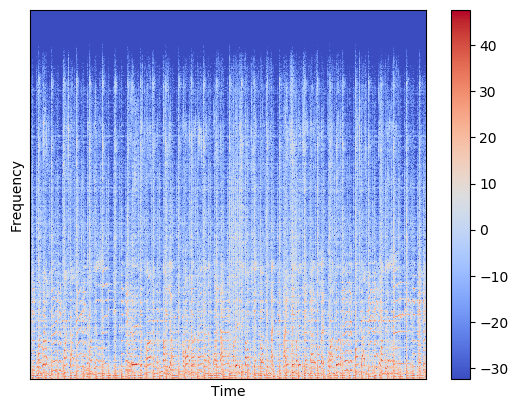

In [6]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# shows a heatmap type data rep
librosa.display.specshow(log_spectrogram,sr=sr,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

# MFCC

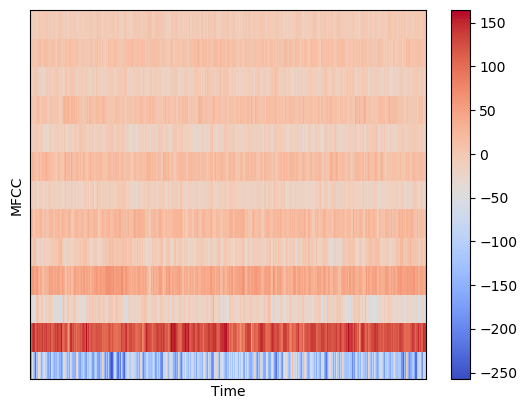

In [8]:
MFCCs = librosa.feature.mfcc(signal,n_fft = no_of_samples_per_fft , hop_length = hop_length , n_mfcc =13)

librosa.display.specshow(MFCCs,sr=sr,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()